# Juan Carlos Apitz
# STAT510 Homework 5

## 1. The Two Sample Problem

#### For this problem we have a model:

$$Y = Xb+\epsilon$$

#### Where:

$$
Y =
\begin{pmatrix}
Y_1\\
\vdots\\
Y_m\\
Y_{m+1}\\
\vdots\\
Y_{m+n}
\end{pmatrix}
,\ \ X =
\begin{pmatrix}
1 & 0\\
\vdots & \vdots\\
1 & 0\\
0 & 1\\
\vdots & \vdots\\
0 & 1
\end{pmatrix}
,\ \ b =
\begin{pmatrix}
b_1\\
b_2
\end{pmatrix}
$$

#### Then we can calculate:

$$
\left(X^T X\right)^{-1} =
\begin{pmatrix}
\frac{1}{m} & 0\\
0 & \frac{1}{n}
\end{pmatrix}
$$

#### Thus b is given by:

$$
b = \left(X^T X\right)^{-1} X^T Y =
\begin{pmatrix}
\frac{1}{m}\sum_{i=1}^m Y_i\\
\frac{1}{n}\sum_{i=1}^n Y_i
\end{pmatrix}
$$

#### Now calculate $V\left(b\right)$:

$$
V\left(b\right) = \left(X^T X\right)^{-1} \sigma^2 =
\begin{pmatrix}
\frac{\sigma^2}{m} & 0\\
0 & \frac{\sigma^2}{n}
\end{pmatrix}
$$

## Python Conquers the Universe

In [1]:
#PANDAS
import pandas as pd
from pandas import DataFrame, Series

#NUMPY
import numpy as np

#SCIPY t and F distributions
from scipy.stats import t
from scipy.stats import f
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import probplot

#STATMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

#SEABORN plotting
import seaborn as sns

#MATPLOTLIB plotting
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Problems

## 8.4

In [2]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH1DS/CH01PR27.txt'

muscle = pd.read_table(filename, delim_whitespace=True, names=['Y','X'])
Xbar = np.mean(muscle['X'])
muscle['Xsq'] = muscle['X']**2
muscle['x'] = muscle['X']-Xbar
muscle['xsq'] = muscle['x']**2
muscle.head()

,Y,X,Xsq,x,xsq
0,106,43,1849,-16.983333,288.433611
1,106,41,1681,-18.983333,360.366944
2,97,47,2209,-12.983333,168.566944
3,113,46,2116,-13.983333,195.533611
4,96,45,2025,-14.983333,224.500278


### a.

The model is $Y = \beta_0 + \beta_1 x +\beta_2 x^2 + \epsilon$

In [3]:
model = ols(formula="Y ~ x + xsq", data=muscle).fit()
b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]

print model.params
print ''
print 'R squared: %0.3f' %model.rsquared

Intercept    82.935749
x            -1.183958
xsq           0.014840
dtype: float64

R squared: 0.763


#### The regression function is:

$$\hat{Y} = 82.9357 - 1.184 x +0.015 x^2$$

#### Regression plot:

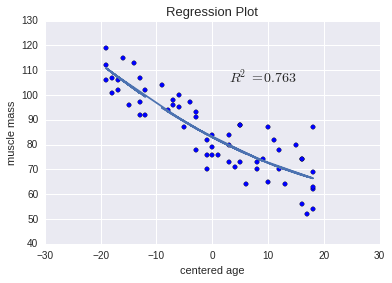

In [4]:
plt.plot(muscle['x'],model.predict())
plt.scatter(muscle['x'],muscle['Y'])
plt.title('Regression Plot', fontsize = 13)
plt.ylabel('muscle mass')
plt.xlabel('centered age')
plt.text(3,105,r'$R^2 = 0.763$',fontsize = 14)
plt.show()

Based on the regression plot and a $R^2 = 0.763$, we can conclude that the model appears to be a good fit for the data.

### b.

Test the following hypothesis:
$$H_o: \beta_1 = \beta_2 = 0$$
$$H_a: \text{at least one } \beta_i \neq 0$$

The p-value corresponding to the F-statistic  from the model is:

In [5]:
print '%0.18f' %model.f_pvalue

0.000000000000000001


Given that this p-value is basically zero, we reject $H_0$ and conclude that there exist a regression relation given $\alpha = 0.05$.

### e.

#### Test the following hypothesis:
$$H_o: \beta_2 = 0$$
$$H_a: \beta_2 \neq 0$$

#### Fit the full and reduced model:

In [6]:
model1 = ols(formula="Y ~ x", data=muscle).fit()

model2 = ols(formula="Y ~ x + xsq", data=muscle).fit()

#### These are the SSR reduced and SSR full:

In [7]:
print 'SSR reduced: %0.2f' %model1.ess
print 'SSR full:    %0.2f' %model2.ess

SSR reduced: 11627.49
SSR full:    11830.62


#### Now calculate the F-statistic:

In [8]:
print '%0.2f' %(((model2.ess-model1.ess)/(model2.df_model-model1.df_model))/model2.mse_resid)

3.15


#### Calculate the critical F-value, $F_{(0.95,1,57)}$

In [9]:
print '%0.2f' %f.ppf(0.95,model2.df_model-model1.df_model,model2.df_resid)

4.01


Since the F-statistic is less than the critical value , fail to reject $H_0$. Thus we can drop the quadratic term from the model.

### f.

#### Calculate the parameters for the regression function in terms of the uncentered X values:

In [10]:
b_prime0 = b0 - b1*Xbar + b2*Xbar**2
b_prime1 = b1 - 2*b2*Xbar
b_prime2 = b2

{'b_prime0':b_prime0,'b_prime1':b_prime1,'b_prime2':b_prime2} 

{'b_prime0': 207.34960798354365,
 'b_prime1': -2.9643229423033732,
 'b_prime2': 0.014840496897854981}

The regression function in terms of X is:
$$\hat{Y} = 207.350 - 2.964 X + 0.015 X^2$$

### g.

#### Calculate the correlation coefficients for $(X,X^2)$ and $(x,x^2):$

In [11]:
np.corrcoef(muscle['X'],muscle['Xsq'])

array([[ 1.        ,  0.99609392],
       [ 0.99609392,  1.        ]])

In [12]:
np.corrcoef(muscle['x'],muscle['xsq'])

array([[ 1.        , -0.03835694],
       [-0.03835694,  1.        ]])

Given that the correlation for $(x,x^2)$ is much lower than for $(X,X^2)$, the use of the centered variable is useful here. It significantly reduces the correlation between the explanatory variables.

## 8.11

In [13]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH6DS/CH06PR05.txt'

preferences = pd.read_table(filename, delim_whitespace=True, names=['Y','X1','X2'])
preferences['X1X2'] = preferences['X1']*preferences['X2']

preferences.head()

,Y,X1,X2,X1X2
0,64,4,2,8
1,73,4,4,16
2,61,4,2,8
3,76,4,4,16
4,72,6,2,12


The model is $Y = \beta_0 + \beta_1 X_1 +\beta_2 X_2 + \beta_3 X_1X_2 + \epsilon$

## a.

#### Fit the full model:

In [14]:
modelf = ols(formula="Y ~ X1 + X2 + X1X2", data=preferences).fit()
print modelf.params

Intercept    27.150
X1            5.925
X2            7.875
X1X2         -0.500
dtype: float64


#### The regression function is:

$$\hat{Y} = 27.150 + 5.925 X_1 + 7.875 X_2 - 0.500 X_1X_2$$

#### Fit the reduced models:

In [15]:
modelr = ols(formula="Y ~ X1 + X2", data=preferences).fit()

#### These are the SSR reduced and SSR full:

In [16]:
print 'SSR reduced: %0.2f' %modelr.ess
print 'SSR full:    %0.2f' %modelf.ess

SSR reduced: 1872.70
SSR full:    1892.70


#### Now calculate the F-statistic:

In [17]:
print '%0.2f' %(((modelf.ess-modelr.ess)/(modelf.df_model-modelr.df_model))/modelf.mse_resid)

3.23


#### Calculate the critical F-value, $F_{(0.95,1,12)}$

In [18]:
print '%0.2f' %f.ppf(0.95,modelf.df_model-modelr.df_model,modelf.df_resid)

4.75


Since the F-statistic is less than the critical value , fail to reject $H_0$. Thus we can drop the interaction term from the model.

## 8.24

In [19]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH8DS/CH08PR24.txt'

valuation = pd.read_table(filename, delim_whitespace=True, names=['Y','X1','X2'])
valuation['X1X2'] = valuation['X1'] * valuation['X2']

valuation.head()

,Y,X1,X2,X1X2
0,78.8,76.4,0,0
1,73.8,74.3,0,0
2,64.6,69.6,0,0
3,76.2,73.6,0,0
4,87.2,76.8,0,0


#### We consider the model $Y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \beta_3 X_{i1}X_{i2} + \epsilon_i$

#### Fit linear models:

In [20]:
n_corner = valuation[valuation['X2']==0]
y_corner = valuation[valuation['X2']==1]

model = ols(formula = 'Y ~ X1 + X2 + X1X2', data = valuation).fit()
n_model = ols(formula = 'Y ~ X1', data = n_corner).fit()
y_model = ols(formula = 'Y ~ X1', data = y_corner).fit()

## a.

#### Produce symbolic scatter plot:

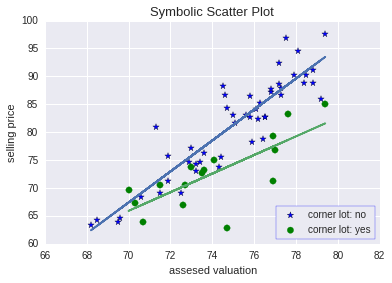

In [21]:
plt.plot(n_corner['X1'],n_model.predict())
plt.plot(y_corner['X1'],y_model.predict())
plt.scatter(n_corner['X1'],n_corner['Y'], label = 'corner lot: no', marker = '*', s = 45)
plt.scatter(y_corner['X1'],y_corner['Y'], color = 'green', label = 'corner lot: yes', s = 40)
plt.title('Symbolic Scatter Plot', fontsize = 13)
plt.ylabel('selling price')
plt.xlabel('assesed valuation')
plt.legend(loc = 4, frameon = True).get_frame().set_edgecolor('b')
plt.show()

The symbolic scatter plot indicates that the regression relation might be different for the two polpulations.

## b.

Test the following hypothesis:
$$H_o: \beta_2 = \beta_3 = 0$$
$$H_a: \text{at least one } \beta_i \neq 0$$

In [22]:
model_r1 = ols(formula = 'Y ~ X1', data = valuation).fit()
model_r2 = ols(formula = 'Y ~ X1 + X2', data = valuation).fit()

#### Create the ANOVA table to break the sum of squares:

In [23]:
SSRF = model.ess
SSRX1 = model_r1.ess
SSRX2GX1 = model_r2.ess - model_r1.ess
SSRX1X2GX1X2 = model.ess - model_r2.ess
SSE = model.ssr
SST = model.centered_tss

SS = Series([SSRF, SSRX1, SSRX2GX1, SSRX1X2GX1X2, SSE, SST])
DF = Series([model.df_model, 1, 1, 1, model.df_resid, model.df_model + model.df_resid ])

aovtbl = DataFrame()
aovtbl['SS'] = SS
aovtbl['df'] = DF
aovtbl['MS'] = SS/DF

aovtbl.index = ['Full Model', 'X1', 'X2|X1', 'X1X2|X2,X1', 'Error', 'Total']

aovtbl['F'] = aovtbl['MS']/aovtbl.loc['Error','MS']

aovtbl.loc['Total',['MS','F']] = 'NA'
aovtbl.loc['Error','F'] = 'NA'

aovtbl

,SS,df,MS,F
Full Model,4237.050215,3,1412.35,93.2137
X1,3670.904250,1,3670.904,242.276
X2|X1,453.147444,1,453.1474,29.90728
"X1X2|X2,X1",112.998521,1,112.9985,7.45779
Error,909.104629,60,15.15174,NA
Total,5146.154844,63,NA,NA


#### Now calculate the F-statistic:

In [24]:
print '%0.2f' %(((SSRX2GX1 + SSRX1X2GX1X2)/2)/model.mse_resid)

18.68


#### Calculate the F-critical value:

In [25]:
print '%0.2f' %f.ppf(0.95,2,model.df_resid)

3.15


Since the F-statistic is greter than the F-critical value, we reject $H_0$. The regression functions for the two populations are not identical.

## c.

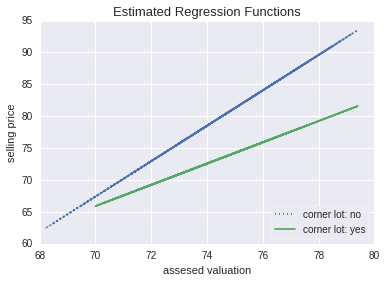

In [26]:
plt.plot(n_corner['X1'],n_model.predict(), label = 'corner lot: no', linestyle = ':')
plt.plot(y_corner['X1'],y_model.predict(), label = 'corner lot: yes')
plt.title('Estimated Regression Functions', fontsize = 13)
plt.ylabel('selling price')
plt.xlabel('assesed valuation')
plt.legend(loc = 4, frameon = True)
plt.show()

The estimated regression plot indicate that the two population models have different slopes and do not intersect. This is an indication of "ordinal" interaction.

## 3.3

In [27]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH1DS/CH01PR19.txt'

gpa = pd.read_table(filename, delim_whitespace=True, names=['Y','X'])

print gpa.shape
gpa.head()

(120, 2)


,Y,X
0,3.897,21
1,3.885,14
2,3.778,28
3,2.540,22
4,3.028,21


### c.

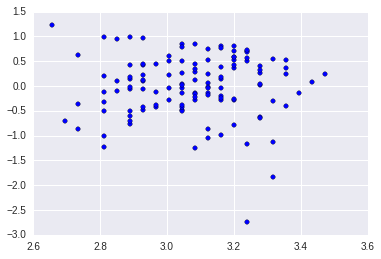

In [28]:
model = ols(formula = 'Y ~ X', data = gpa).fit()
plt.scatter(model.predict(),model.resid)
plt.show()

Based on the above plot, I don't see much evidence of departure from the simple regression model. The only thing is that we see some large residuals which might be an indication of fatter tails. This implies that the response variable may follow a t-distribution instead of a normal distribution. Also, the plot has a bit of a cone shape, which indicates possible hetroscedasticity.

### d.

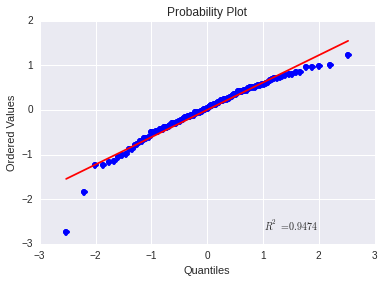

In [29]:
import pylab
probplot(model.resid, plot = pylab)
pylab.show()

#### Calculate the coefficient of correlation:

In [30]:
e1 = probplot(model.resid)[0][0]
e2 = probplot(model.resid)[0][1]
print '%0.3f' %np.corrcoef(e1,e2)[0][1]

0.973


The critical value from table B.6 is 0.987 at $\alpha = 0.05$ with $n = 100$. Since this value is greater than the calculated correlation coefficient, $\rho = 0.973$, we conclude that the normality of the residuals assumption is violated.

### e.

The Brown-Frosythe test:

$$H_0: \sigma^2_1 = \sigma^2_2$$
$$H_a: \sigma^2_1 \neq \sigma^2_2$$

In [31]:
# this gives actual indexes
resid1 = np.where(gpa['X'] < 26)[0]
resid2 = np.where(gpa['X'] >= 26)[0]

In [32]:
resid1 = model.resid[resid1]
resid2 = model.resid[resid2]

In [33]:
d1 = np.abs(resid1 - np.median(resid1))
d2 = np.abs(resid2 - np.median(resid2))

n= len(gpa)
n1 = len(resid1)
n2 = len(resid2)

v = (np.sum((d1 - np.mean(d1))**2) + np.sum((d2 - np.mean(d2))**2))/(n - 2)

numer = np.mean(d1) - np.mean(d2)
denom = np.sqrt(v*((1./n1)+(1./n2)))

t_bf = numer/denom

The $\left|t_{BF}\right|$ is:

In [34]:
print '%0.2f' %np.abs(t_bf)

0.90


The $t_{0.995,118}$ is:

In [35]:
print '%0.2f' %t.ppf(0.995, n - 2)

2.62


Since $\left|t_{BF}\right|<t_{0.995,118}$, fail to reject $H_0$. The variances are equal.

## 3.6

In [36]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH1DS/CH01PR22.txt'

hardness = pd.read_table(filename, delim_whitespace=True, names=['Y','X'])

print hardness.shape
hardness.head()

(16, 2)


,Y,X
0,199,16
1,205,16
2,196,16
3,200,16
4,218,24


### b.

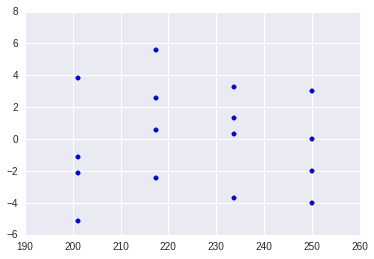

In [37]:
model = ols(formula = 'Y ~ X', data = hardness).fit()
plt.scatter(model.predict(),model.resid)
plt.show()

### c.

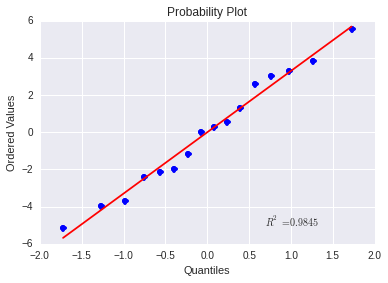

In [38]:
probplot(model.resid, plot = pylab)
pylab.show()

#### Calculate the coefficient of correlation:

In [39]:
e1 = probplot(model.resid)[0][0]
e2 = probplot(model.resid)[0][1]
print '%0.3f' %np.corrcoef(e1,e2)[0][1]

0.992


The critical value from table B.6 is 0.941 at $\alpha = 0.05$ with $n = 16$. Since this value is less than the calculated correlation coefficient, $\rho = 0.992$, we conclude that the normality of the residuals assumption is not violated.

### e.

The Brown-Frosythe test:

$$H_0: \sigma^2_1 = \sigma^2_2$$
$$H_a: \sigma^2_1 \neq \sigma^2_2$$

In [40]:
# this gives actual indexes
resid1 = np.where(hardness['X'] < 24)[0]
resid2 = np.where(hardness['X'] >= 24)[0]

In [41]:
resid1 = model.resid[resid1]
resid2 = model.resid[resid2]

In [42]:
d1 = np.abs(resid1 - np.median(resid1))
d2 = np.abs(resid2 - np.median(resid2))

n= len(hardness)
n1 = len(resid1)
n2 = len(resid2)

v = (np.sum((d1 - np.mean(d1))**2) + np.sum((d2 - np.mean(d2))**2))/(n - 2)

numer = np.mean(d1) - np.mean(d2)
denom = np.sqrt(v*((1./n1)+(1./n2)))

t_bf = numer/denom

The $\left|t_{BF}\right|$ is:

In [43]:
print '%0.2f' %np.abs(t_bf)

0.15


The $t_{0.975,14}$ is:

In [44]:
print '%0.2f' %t.ppf(0.975, n - 2)

2.14


Since $\left|t_{BF}\right|<t_{0.995,118}$, fail to reject $H_0$. The variances are equal.

## 10.6

In [45]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH6DS/CH06PR09.txt'

grocery = pd.read_table(filename, delim_whitespace=True, names=['Y','X1','X2','X3'])

print grocery.shape
grocery.head()

(52, 4)


,Y,X1,X2,X3
0,4264,305657,7.17,0
1,4496,328476,6.20,0
2,4317,317164,4.61,0
3,4292,366745,7.02,0
4,4945,265518,8.61,1


## a. 

#### Fit the model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$

In [46]:
model = ols(formula = 'Y ~ X1 + X2', data = grocery).fit()

DataFrame({'parameters': model.params, 'pvalues': model.pvalues})

,parameters,pvalues
Intercept,3995.478668,5.720203e-16
X1,0.000919,1.517121e-01
X2,12.120517,7.618098e-01


## b.

In [47]:
modely1 = ols(formula = 'Y ~ X2', data = grocery).fit()
modelx1 = ols(formula = 'X1 ~ X2', data = grocery).fit()
modely2 = ols(formula = 'Y ~ X1', data = grocery).fit()
modelx2 = ols(formula = 'X2 ~ X1', data = grocery).fit()

#### Added variable plot for $X_1$ when $X_2$ is already in the model:

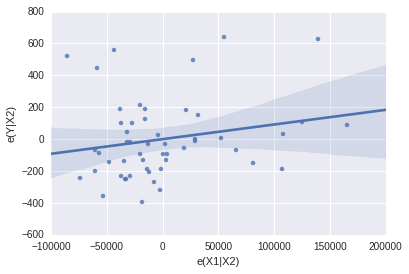

In [48]:
x, y = Series(modelx1.resid, name = 'e(X1|X2)'), Series(modely1.resid, name = 'e(Y|X2)')
sns.regplot(x,y)
plt.show()

#### Added variable plot for $X_2$ when $X_1$ is already in the model:

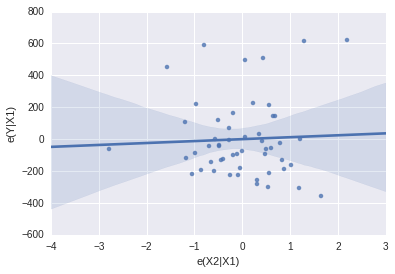

In [49]:
x, y = Series(modelx2.resid, name = 'e(X2|X1)'), Series(modely2.resid, name = 'e(Y|X1)')
sns.regplot(x,y)
plt.show()

## c.

The added variable plots in part b. suggest that the regression relation is not appropriate.

## d.

#### Fit the model:
$$e\left(Y|X_1\right) = \gamma_0 + \gamma_1 e\left(X_2|X_1\right) + \epsilon$$

In [50]:
residuals = DataFrame({'eX2X1': modelx2.resid, 'eYX1': modely2.resid})
model = ols(formula = 'eYX1 ~ eX2X1', data = residuals).fit()

We find that $\hat{\gamma_1} = \hat{\beta_1}$, where $\hat{\beta_1}$ is the coefficient in the model fit in part a.

In [51]:
print '%0.4f' %model.params[1]

12.1205


## 10.13

In [52]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH10DS/CH10PR13.txt'

cosmetic = pd.read_table(filename, delim_whitespace=True, names=['Y','X1','X2','X3'])

print cosmetic.shape
cosmetic.head()

(44, 4)


,Y,X1,X2,X3
0,12.85,5.6,5.6,3.8
1,11.55,4.1,4.8,4.8
2,12.78,3.7,3.5,3.6
3,11.19,4.8,4.5,5.2
4,9.00,3.4,3.7,2.9


## a.

#### Fit the model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$

In [53]:
model = ols(formula = 'Y ~ X1 + X2 + X3', data = cosmetic).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     38.28
Date:                Sat, 21 Nov 2015   Prob (F-statistic):           7.82e-12
Time:                        08:54:38   Log-Likelihood:                -86.816
No. Observations:                  44   AIC:                             181.6
Df Residuals:                      40   BIC:                             188.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0233      1.203      0.851      0.400        -1.408     3.454
X1             0.9657      0.709      1.362      0.181        -0.468     2.399
X2             0.6292      0.778      0.808      0.424        -0.944     2.202
X3             0.6760      0.356      1.900      0.065        -0.043     1.395
==============================================================================
Omnibus:                        3.728   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                2.683
Skew:                          -0.377   Prob(JB):                        0.261
Kurtosis:                       3.946   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b.

Test the following hypothesis:
$$H_o: \beta_1 = \beta_2 = \beta_3 = 0$$
$$H_a: \text{at least one } \beta_i \neq 0$$

The results of the regression model in a. show a p-value of nearly zero corresponding to the F-statistic from the model. Based on this we reject $H_0$ and conclude there is a regression relation.

## c.

The results of the regression model in b. show that the p-values corresponding to the t-statistic for each parameter estimate are all greater than $\alpha =  0.05$, hence we would conclude that each parameter indidually is not significant. This contradicts our conclusion in b. 

## d.

In [54]:
X = cosmetic.iloc[:,1::]
r = DataFrame(np.corrcoef(X.T), index = ['X1','X2','X3'], columns = ['X1','X2','X3'])
r

,X1,X2,X3
X1,1.000000,0.974431,0.375951
X2,0.974431,1.000000,0.409921
X3,0.375951,0.409921,1.000000


## e.

Based on the inconsistency of the results and the fact that the explanaory variables exhibit significant correlation (as evidenced by the results in d.) the data is not suitable for the model used. 

## 10.14

## a.

In [55]:
vif = DataFrame(np.linalg.inv(r).diagonal(), columns = ['VIF'], index = ['X1','X2','X3'])
vif.loc[3] = vif.mean()
vif.index = ['X1','X2','X3','mean']
vif

,VIF
X1,20.072031
X2,20.716101
X3,1.217973
mean,14.002035


Since the mean VIF is 14.002 (much greater than 1), there is a serious multicollinearity problem.

## b.

In [56]:
model = ols(formula = 'Y ~ X1', data = cosmetic).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sat, 21 Nov 2015   Prob (F-statistic):           8.23e-13
Time:                        08:54:39   Log-Likelihood:                -89.472
No. Observations:                  44   AIC:                             182.9
Df Residuals:                      42   BIC:                             186.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.1628      0.671      4.712      0.000         1.808     4.517
X1             1.6581      0.164     10.104      0.000         1.327     1.989
==============================================================================
Omnibus:                        7.184   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.236
Skew:                          -0.699   Prob(JB):                       0.0442
Kurtosis:                       4.202   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model obtain is now a good fit, with the explanatory variable $X_1$ now being highly significant (p-value = 0.000). So, with all else remaining equal, a \$1000 change in expenditures for point-of-sale advertising is expected to increase sales by \$1,658 approximately. However, this does not differentiate the influence that $X_2$ and $X_3$ have on sales, thus the result might not be reliable.

## c.

An experiment would be better because then we could control for the effects of $X_2$ and $X_3$. A possible design would be to divide the 44 territories into two groups, hold $X_2$ and $X_3$ constant,then increase point-of-sale expenditures in one of the groups and not the other. After the sales data is gathered we could perform ANOVA to determine significant differences between the two groups. 

## 10.16

In [57]:
grocery.head()

,Y,X1,X2,X3
0,4264,305657,7.17,0
1,4496,328476,6.20,0
2,4317,317164,4.61,0
3,4292,366745,7.02,0
4,4945,265518,8.61,1


## a.

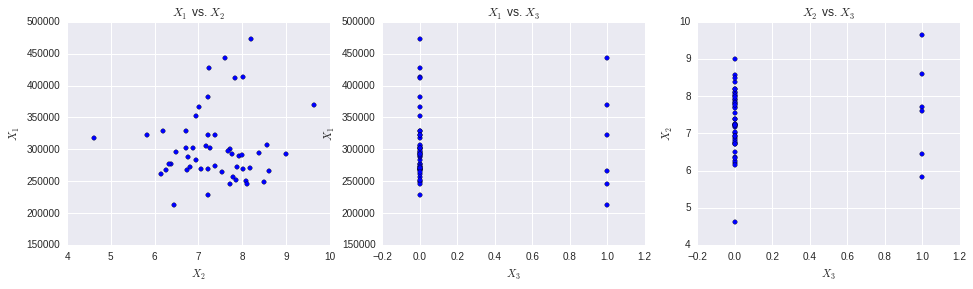

In [58]:
X = grocery.iloc[:,1::]

plt.figure(figsize = (16,4))
plt.subplot(1,3,1)
plt.scatter(grocery['X2'],grocery['X1'])
plt.title('$X_1$ vs. $X_2$')
plt.xlabel('$X_2$')
plt.ylabel('$X_1$')
plt.subplot(1,3,2)
plt.scatter(grocery['X3'],grocery['X1'])
plt.title('$X_1$ vs. $X_3$')
plt.xlabel('$X_3$')
plt.ylabel('$X_1$')
plt.subplot(1,3,3)
plt.scatter(grocery['X3'],grocery['X2'])
plt.title('$X_2$ vs. $X_3$')
plt.xlabel('$X_3$')
plt.ylabel('$X_2$')
plt.show()

In [59]:
r = DataFrame(np.corrcoef(X.T), index = ['X1','X2','X3'], columns = ['X1','X2','X3'])
r

,X1,X2,X3
X1,1.000000,0.084896,0.045657
X2,0.084896,1.000000,0.113371
X3,0.045657,0.113371,1.000000


The scatter plots and correlation matrix show that although there appears to be some correlation among the explanatory variables, the correlation is not necessarily high. Multicollinearity is not a serious problem.

## b.

In [60]:
vif = DataFrame(np.linalg.inv(r).diagonal(), columns = ['VIF'], index = ['X1','X2','X3'])
vif.loc[3] = vif.mean()
vif.index = ['X1','X2','X3','mean']
vif

,VIF
X1,1.008596
X2,1.019598
X3,1.014364
mean,1.014186


The mean VIF is just over 1. This is an indication that multicollinearity is not a serious problem. 